In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
filepath = "datasets/dc_properties.csv"

df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.

In [7]:
df.heat

AttributeError: 'DataFrame' object has no attribute 'heat'

In [13]:
#Method 1 Manual calculation

#Meand of the column
cMean= df['PRICE'].mean()
cMean

#Standad deviation of the column


931351.5949336156

In [19]:
cStd= df['PRICE'].std()
cStd

7061324.955612032

In [20]:
zManual=(df['PRICE']-cMean)/cStd

In [21]:
zManual.head()

0    0.023175
1         NaN
2    0.165500
3    0.094975
4         NaN
Name: PRICE, dtype: float64

In [22]:
#Method 2: use scikit-learn to calculate Z-scores

#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()


In [23]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
priceZScore=scaler.fit_transform(df[['PRICE']])

In [25]:
priceZScore.mean(), priceZScore.std()

(nan, nan)

In [27]:
priceZScore

array([[ 0.02317543],
       [        nan],
       [ 0.16550072],
       ...,
       [-0.04692509],
       [-0.10143355],
       [        nan]])

In [29]:
priceZScoreCol= pd.Series(priceZScore.reshape(-1))

In [30]:
priceZScoreCol

0         0.023175
1              NaN
2         0.165501
3         0.094975
4              NaN
5         0.144258
6              NaN
7         0.016803
8         0.070617
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14        0.055747
15             NaN
16        0.043710
17             NaN
18             NaN
19       -0.048023
20       -0.127189
21             NaN
22       -0.003392
23        0.018927
24        0.023884
25       -0.129063
26             NaN
27       -0.032239
28             NaN
29        0.039461
            ...   
158927         NaN
158928   -0.042337
158929   -0.050607
158930   -0.080205
158931   -0.074540
158932   -0.060379
158933   -0.058254
158934   -0.061101
158935   -0.068026
158936   -0.051896
158937         NaN
158938   -0.038428
158939   -0.078081
158940         NaN
158941         NaN
158942         NaN
158943   -0.055564
158944   -0.003236
158945   -0.068168
158946   -0.063161
158947   -0.086578
158948   -0.

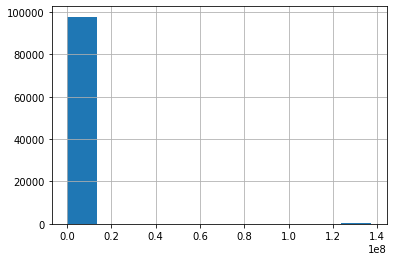

In [31]:
#first 5 rows of z-score standardized glucose column
df['PRICE'].hist()

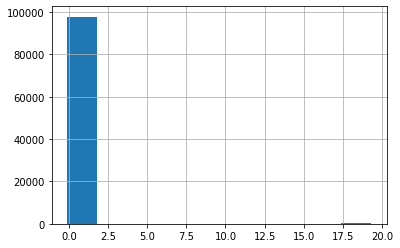

In [32]:
priceZScoreCol.hist()